In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Function for preparing a dataframe

def createDf(sheet_name):
    df = pd.read_excel(xlsx, sheet_name=sheet_name, skiprows=5, usecols=range(4,100))
    df.rename(columns={'Unnamed: 4' : 'Branch'}, inplace=True)
    df.set_index('Branch', inplace=True)
    df.replace('-', np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

In [3]:

# Variable for the file object

xlsx = pd.ExcelFile("/home/ghost/Downloads/Place.xlsx")



### Data cleaning

# XLSX sheet 1:

df_net = createDf('9.3.1.')

# XLSX sheet 2:

df_gross = createDf('9.3.3.')
#df3 = df3[~df3.index.duplicated(keep='first')]
df_gross = df_gross[~df_gross.index.duplicated(keep='first')]

In [4]:
# Function for creating a bar graph

def barGraph(x_label, y_label, legend=False):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x_label, y_label)
    if legend:
        ax.legend(legend)
    plt.show()

## Annual salaries (2015 - 2020)

In [5]:
# Branches of this research

print("\nThe studied branches:\n\n")
count = 0
for item in df_gross.index:
    count += 1
    print(f"{count}. {item}")


The studied branches:


1. Total
2. Agriculture, forestry and fishing
3. Crop and animal production, hunting and related service activities
4. Forestry and logging
5. Fishing and aquaculture
6. Mining and quarrying
7. Extraction of crude petroleum and natural gas
8. Other mining and quarrying
9. Mining support service activities
10. Manufacturing
11. Manufacture of food products
12. Manufacture of beverages
13. Manufacture of tobacco products
14. Manufacture of textiles
15. Manufacture of wearing apparel
16. Manufacture of leather and related products
17. Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials
18. Manufacture of paper and paper products
19. Printing and reproduction of recorded media
20. Manufacture of coke and refined petroleum products
21. Manufacture of chemicals and chemical products
22. Manufacture of basic pharmaceutical products and  pharmaceutical preparations
23. Manufacture of rubber and

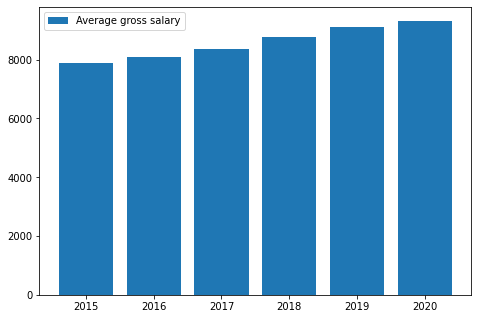

In [6]:
# Additional dataframe consisiting of annual data: 2015-2020

df_2015_2020_gross = df_gross[['Ø 2015.', 'Ø 2016.', 'Ø 2017.', 'Ø 2018.', 'Ø 2019.', 'Ø 2020.']].copy()
df_2015_2020_gross.columns=['2015', '2016', '2017', '2018', '2019', '2020']
total = df_2015_2020_gross.iloc[0]
df_2015_2020_gross.drop(['Total'], axis=0, inplace=True)


# Adjusted mean salaries - mean of all branches calculated by usining the Pandas library function:

mean_s1 = df_2015_2020_gross.mean()
mean_df_gross = mean_s1.to_frame().T


# Bar graph

barGraph(mean_df_gross.columns, mean_df_gross.iloc[0], legend=['Average gross salary'])

In [7]:
mean_df_gross.index = ['Mean']
mean_df_gross

,2015,2016,2017,2018,2019,2020
Mean,7875.397959,8081.55102,8348.918367,8776.918367,9102.408163,9329.153061


### Min/Max & Range

In [17]:
df_2015_2020_gross.max().to_frame()

,0
2015,15219.000
2016,15751.000
2017,15378.000
2018,15745.000
2019,16638.000
2020,16397.000


#### Branch with maximal salaries

In [24]:
df_2015_2020_gross[df_2015_2020_gross['2015'] == df_2015_2020_gross['2015'].max()]

,2015,2016,2017,2018,2019,2020
Branch,,,,,,
Air transport,15219.000,15068.000,15378.000,15745.000,16638.000,14810.000


In [25]:
df_2015_2020_gross.min().to_frame()

,0
2015,4077.000
2016,4223.000
2017,4482.000
2018,4954.000
2019,5388.000
2020,5683.000


#### Branch with minimal salaries

In [22]:
df_2015_2020_gross[df_2015_2020_gross['2015'] == df_2015_2020_gross['2015'].min()]

,2015,2016,2017,2018,2019,2020
Branch,,,,,,
Manufacture of wearing apparel,4077.000,4223.000,4482.000,5254.000,5424.000,5696.000


In [29]:
df_range = df_2015_2020_gross.max().to_frame() - df_2015_2020_gross.min().to_frame()
df_range.columns = ['Range']
df_range

,Range
2015,11142.000
2016,11528.000
2017,10896.000
2018,10791.000
2019,11250.000
2020,10714.000


### Variance and Standard Deviation

#### Pandas build-in functions:

In [31]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [32]:
var1 = df_2015_2020_gross.var().to_frame()
var1.columns=['Variance']
var1

,Variance
2015,5804913.355
2016,6466715.198
2017,5961012.261
2018,5970224.014
2019,6416909.667
2020,6375631.224


In [33]:
std1 = df_2015_2020_gross.std().to_frame()
std1.columns=['Standard Deviation']
std1

,Standard Deviation
2015,2409.339
2016,2542.974
2017,2441.518
2018,2443.404
2019,2533.162
2020,2525.001


#### Manually, using the formulas
#### Assumption: collected data is the sample

### Variance

In [78]:
#Simple for loop for data from 2015
difference = 0
for item in df_2015_2020_gross['2015']:
    difference += (item - df_2015_2020_gross['2015'].mean()) ** 2
s_squared = difference / (len(df_2015_2020_gross['2015']) - 1)
s_squared

5804913.35545971

In [79]:
#Vectorized operation - usually much more efficient

df_var = []
for column in df_2015_2020_gross.columns:
    df_var.append(sum((df_2015_2020_gross[column] - df_2015_2020_gross[column].mean()) ** 2) / (len(df_2015_2020_gross[column]) - 1))
    
df_var = pd.DataFrame(df_var)
df_var.index = df_2015_2020_gross.columns
df_var.columns = ['Variance']
df_var

,Variance
2015,5804913.355
2016,6466715.198
2017,5961012.261
2018,5970224.014
2019,6416909.667
2020,6375631.224


### Standard Deviation

In [68]:
#std is the (positive) square root of variance

std_df = np.sqrt(df_var)
std_df.columns = ['Standard Deviation']
std_df

,Standard Deviation
2015,2409.339
2016,2542.974
2017,2441.518
2018,2443.404
2019,2533.162
2020,2525.001


### Variance between years

In [82]:
s = mean_df_gross.T.var()[0]
print(f"The variance between mean salaries in years 2015-2020 is: {round(s, 2)}")

The variance between mean salaries in years 2015-2020 is: 334206.99


### Standard Deviation between years

In [83]:
#Transposed dataframe of mean gross salaries in years 2015-2020 and the std:

std_b_y = mean_df_gross.T.std()[0]
print(f"The standard deviation between mean salaries in years 2015-2020 is: {round(std_b_y, 2)}")

The standard deviation between mean salaries in years 2015-2020 is: 578.11


### Five-number Summary

In [13]:
round(df_2015_2020_gross.describe(), 3)

,2015,2016,2017,2018,2019,2020
count,98.000,98.000,98.000,98.000,98.000,98.000
mean,7875.398,8081.551,8348.918,8776.918,9102.408,9329.153
std,2409.339,2542.974,2441.518,2443.404,2533.162,2525.001
min,4077.000,4223.000,4482.000,4954.000,5388.000,5683.000
25%,6348.250,6385.000,6692.750,7208.500,7522.000,7557.250
50%,7486.000,7651.500,7879.500,8194.500,8555.500,8566.500
75%,8964.500,9107.000,9441.250,9865.750,10220.750,10508.750
max,15219.000,15751.000,15378.000,15745.000,16638.000,16397.000


### Coefficient of Variation